# ナスダック指数 週足 移動メディアン

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import yfinance as yf

symbol = '^IXIC'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-30 00:00:00-05:00,11512.339844,12269.549805,11388.540039,12006.950195,30146210000,0.0,0.0
2023-02-06 00:00:00-05:00,11904.410156,12150.219727,11630.540039,11718.120117,26732780000,0.0,0.0
2023-02-13 00:00:00-05:00,11759.089844,12071.290039,11673.209961,11787.269531,24926590000,0.0,0.0
2023-02-20 00:00:00-05:00,11640.370117,11684.139648,11334.469727,11394.940430,18821040000,0.0,0.0
2023-02-27 00:00:00-05:00,11517.190430,11699.629883,11273.610352,11689.009766,25178450000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-30 00:00:00-05:00,19460.410156,19638.660156,19117.589844,19621.679688,34208720000,0.0,0.0
2025-01-06 00:00:00-05:00,19851.990234,20007.949219,19018.750000,19161.630859,40418570000,0.0,0.0
2025-01-13 00:00:00-05:00,18903.660156,19709.640625,18831.910156,19630.199219,37341470000,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-27 00:00:00-05:00,9201.820312,9329.120117,9123.219727,9150.940430,9445100000,0.0,0.0
2020-02-03 00:00:00-05:00,9190.719727,9575.660156,9188.549805,9520.509766,11902480000,0.0,0.0
2020-02-10 00:00:00-05:00,9493.629883,9748.320312,9493.629883,9731.179688,11485690000,0.0,0.0
2020-02-17 00:00:00-05:00,9679.040039,9838.370117,9542.330078,9576.589844,10246170000,0.0,0.0
2020-02-24 00:00:00-05:00,9188.440430,9322.879883,8264.160156,8567.370117,20251980000,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-30 00:00:00-05:00,19460.410156,19638.660156,19117.589844,19621.679688,34208720000,0.0,0.0
2025-01-06 00:00:00-05:00,19851.990234,20007.949219,19018.750000,19161.630859,40418570000,0.0,0.0
2025-01-13 00:00:00-05:00,18903.660156,19709.640625,18831.910156,19630.199219,37341470000,0.0,0.0


In [3]:
period = 13
r_last = len(df0)
r1 = 0
df0['MM13'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm13 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM13'] = mm13
    r1 += 1

In [4]:
period = 26
r_last = len(df0)
r1 = 0
df0['MM26'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm26 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM26'] = mm26
    r1 += 1

In [5]:
period = 52
r_last = len(df0)
r1 = 0
df0['MM52'] = np.nan
while r1 < r_last - period:
    r2 = r1 + period
    df1 = df0.iloc[r1:r2].copy()
    mm52 = np.median(df1['Close'])
    name_index = df0.index[r2]
    df0.at[name_index, 'MM52'] = mm52
    r1 += 1
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MM13,MM26,MM52
Date,,,,,,,,,,
2020-01-27 00:00:00-05:00,9201.820312,9329.120117,9123.219727,9150.940430,9445100000,0.0,0.0,NaN,NaN,NaN
2020-02-03 00:00:00-05:00,9190.719727,9575.660156,9188.549805,9520.509766,11902480000,0.0,0.0,NaN,NaN,NaN
2020-02-10 00:00:00-05:00,9493.629883,9748.320312,9493.629883,9731.179688,11485690000,0.0,0.0,NaN,NaN,NaN
2020-02-17 00:00:00-05:00,9679.040039,9838.370117,9542.330078,9576.589844,10246170000,0.0,0.0,NaN,NaN,NaN
2020-02-24 00:00:00-05:00,9188.440430,9322.879883,8264.160156,8567.370117,20251980000,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-12-30 00:00:00-05:00,19460.410156,19638.660156,19117.589844,19621.679688,34208720000,0.0,0.0,19003.650391,18291.429688,17245.505859
2025-01-06 00:00:00-05:00,19851.990234,20007.949219,19018.750000,19161.630859,40418570000,0.0,0.0,19218.169922,18291.429688,17494.800781
2025-01-13 00:00:00-05:00,18903.660156,19709.640625,18831.910156,19630.199219,37341470000,0.0,0.0,19218.169922,18291.429688,17657.850586


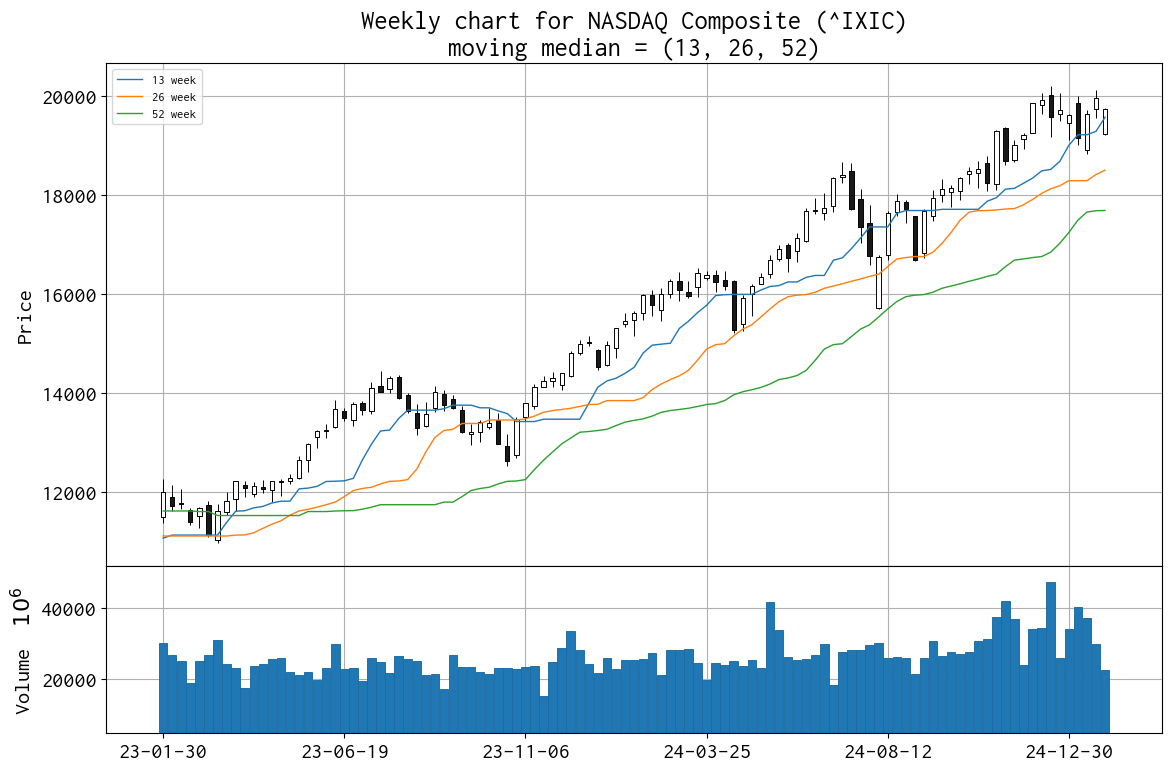

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm13 = df0['MM13']
mm26 = df0['MM26']
mm52 = df0['MM52']
apds  = [
    mpf.make_addplot(mm13[df.index], width=1, label='13 week', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=1, label='26 week', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=1, label='52 week', ax=ax[0]),
]

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='best', fontsize=9)

plt.tight_layout()
plt.savefig('weekly_chart_ixic.png')
plt.show()

In [20]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-13 00:00:00+09:00,39010.960938,39054.351562,38055.679688,38451.460938,457100000,0.0,0.0
2025-01-20 00:00:00+09:00,38671.769531,40279.789062,38643.839844,39931.980469,531000000,0.0,0.0


In [21]:
df.tail(2)['Close']

Date
2025-01-13 00:00:00+09:00    38451.460938
2025-01-20 00:00:00+09:00    39931.980469
Name: Close, dtype: float64

In [22]:
df.tail(2)['Close'].diff()

Date
2025-01-13 00:00:00+09:00            NaN
2025-01-20 00:00:00+09:00    1480.519531
Name: Close, dtype: float64

In [23]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-01-20 00:00:00+09:00    1260.210938
dtype: float64

In [24]:
df['Close'].rolling(13).mean()

Date
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
                                 ...     
2024-12-23 00:00:00+09:00    38874.661659
2024-12-30 00:00:00+09:00    38971.501502
2025-01-06 00:00:00+09:00    38939.547476
2025-01-13 00:00:00+09:00    38898.756010
2025-01-20 00:00:00+09:00    39053.991286
Name: Close, Length: 105, dtype: float64

In [25]:
df['Close'].rolling(26).mean()

Date
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
                                 ...     
2024-12-23 00:00:00+09:00    38528.497746
2024-12-30 00:00:00+09:00    38489.350361
2025-01-06 00:00:00+09:00    38412.416466
2025-01-13 00:00:00+09:00    38350.403846
2025-01-20 00:00:00+09:00    38437.502704
Name: Close, Length: 105, dtype: float64

In [26]:
df['Close'].rolling(52).mean()

Date
2023-01-23 00:00:00+09:00             NaN
2023-01-30 00:00:00+09:00             NaN
2023-02-06 00:00:00+09:00             NaN
2023-02-13 00:00:00+09:00             NaN
2023-02-20 00:00:00+09:00             NaN
                                 ...     
2024-12-23 00:00:00+09:00    38349.995944
2024-12-30 00:00:00+09:00    38475.325120
2025-01-06 00:00:00+09:00    38544.811448
2025-01-13 00:00:00+09:00    38592.661283
2025-01-20 00:00:00+09:00    38673.063401
Name: Close, Length: 105, dtype: float64